## Parte I – Resolvendo um Problema Linearmente Separável

## Alunos: 
### - Luiz Carlos Glomyer Pereira Gomes Junior - 2015310021
### - Santiago Augusto de Souza Monteiro - 1915080043

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [49]:
class Perceptron:
  def __init__(self, data, dataLength):
    self.data = data
    self.dataLength = dataLength
    self.epoch = 0

  
  def step(self, u):
    if (u >= 0):
      return (1.0)
    else:
      return (0.0)

  def getNextWeightsVector(self, previousWeightsVector, error, inputAttributesVector):
    # Delta Rule
    learningRate = 0.1
    return (previousWeightsVector + learningRate * error * inputAttributesVector)

  def getWeightedSum(self, inputAttributesVector, weightsVector):
    multiplicationOfVectors = inputAttributesVector * weightsVector
    return (multiplicationOfVectors.sum())

  def getError(self, realOutput, outputDeducted):
    return (realOutput - outputDeducted)

  def checkArrayEquality(self, array1, array2):
    return (np.array_equal(array1, array2))

  def getWeightsVector(self):
    weightsVector = np.array([])
    for i in range(3):
      randomNumber = random.uniform(-0.5, 0.5)
      weightsVector = np.append(weightsVector, randomNumber)
    return (weightsVector)

  def getOutputVector(self, data):
    outputVector = np.array([])
    for e in data:
      outputVector = np.append(outputVector, e[2])
    return outputVector

  def addBiasToInputVector(self, inputVector):
    return np.insert(inputVector, 0, -1.0)

  def getInputVectorGroup(self, data, dataLength):
    inputVectorGroup = np.array([])
    for e in data:
      inputVector = e[:2]
      inputVectorWithBias = self.addBiasToInputVector(inputVector)
      inputVectorGroup = np.append(inputVectorGroup, inputVectorWithBias)
    return inputVectorGroup.reshape((dataLength, 3))

  def teachPerceptron(self):
    deducedOutputVector = np.array([])
    outputVector = self.getOutputVector(self.data)
    weightsVector = self.getWeightsVector()
    inputVectorGroup = self.getInputVectorGroup(self.data, self.dataLength)

    numberOfFitsInTheWeightVector = 0
    epoch = 0

    print("vetor de pesos: ", weightsVector)

    while (not self.checkArrayEquality(deducedOutputVector, outputVector)):
      epoch += 1
      localFits = 0

      for i in range(len(inputVectorGroup)):
        inputVector = inputVectorGroup[i]
        realOutput = outputVector[i]

        weightedSum = self.getWeightedSum(inputVector, weightsVector)
        outputDeducted = self.step(weightedSum)
        
        if (len(deducedOutputVector) == self.dataLength):
          deducedOutputVector[i] = outputDeducted
        else:
          deducedOutputVector = np.insert(deducedOutputVector, i, outputDeducted)

        error = self.getError(realOutput, outputDeducted)

        if (error):
          weightsVector = self.getNextWeightsVector(weightsVector, error, inputVector)
          numberOfFitsInTheWeightVector += 1
          localFits += 1

      print(f"Época: {epoch} ")
      print(f"Número de ajustes feitos no vetor de pesos na época: {localFits}")
      print(f"Número de ajustes feitos no vetor de pesos até o momento: {numberOfFitsInTheWeightVector}")
      print()
    
    print("O número total de ajustes no vetor de pesos: ", numberOfFitsInTheWeightVector)
    print("número de épocas até a convergência: ", epoch)
    print("vetor de pesos final: ", weightsVector)

    self.plotPerceptronLearning(self.data, outputVector, weightsVector)

  def plotPerceptronLearning(self, data, outputVector, weightsVector):
    data_array = self.getInputVectorGroup(data, len(data))
    data_array = np.delete(data_array, 0, 1)
    
    # Plot the vector
    plt.figure(figsize=(10, 5))
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Vector Plot')

    for i, point in enumerate(data_array):
      if(outputVector[i] == 1):
          plt.scatter(point[0],point[1], s=10, color="red", marker="s")
      if(outputVector[i] == 0):
          plt.scatter(point[0],point[1], s=10, color="blue", marker="o")
    
    x = np.arange(min(data_array[:,:1]),max(data_array[:,:1]), 0.1)
    y = weightsVector[0]/weightsVector[2] - (weightsVector[1]/weightsVector[2] * x)
    
    plt.axline((x[0],y[0]), 
              (x[1],y[1]), 
              color="black", 
              linewidth=2)

    # Show the plot
    plt.show()

  def teachPerceptronByEpoch(self, epoch):
    deducedOutputVector = np.array([])
    outputVector = self.getOutputVector(self.data)
    weightsVector = self.getWeightsVector()
    inputVectorGroup = self.getInputVectorGroup(self.data, self.dataLength)

    numberOfFitsInTheWeightVector = 0

    print("vetor de pesos: ", weightsVector)

    for e in range(epoch):
      localFits = 0

      for i in range(len(inputVectorGroup)):
        inputVector = inputVectorGroup[i]
        realOutput = outputVector[i]

        weightedSum = self.getWeightedSum(inputVector, weightsVector)
        outputDeducted = self.step(weightedSum)
        
        if (len(deducedOutputVector) == self.dataLength):
          deducedOutputVector[i] = outputDeducted
        else:
          deducedOutputVector = np.insert(deducedOutputVector, i, outputDeducted)

        error = self.getError(realOutput, outputDeducted)

        if (error):
          weightsVector = self.getNextWeightsVector(weightsVector, error, inputVector)
          numberOfFitsInTheWeightVector += 1
          localFits += 1

      print(f"Época: {e + 1} ")
      print(f"Número de ajustes feitos no vetor de pesos na época: {localFits}")
      print(f"Número de ajustes feitos no vetor de pesos até o momento: {numberOfFitsInTheWeightVector}")
      print()
    
    print("O número total de ajustes no vetor de pesos: ", numberOfFitsInTheWeightVector)
    print("vetor de pesos final: ", weightsVector)

vetor de pesos:  [-0.47085624  0.37268566  0.07493527]
Época: 1 
Número de ajustes feitos no vetor de pesos na época: 48
Número de ajustes feitos no vetor de pesos até o momento: 48

Época: 2 
Número de ajustes feitos no vetor de pesos na época: 11
Número de ajustes feitos no vetor de pesos até o momento: 59

Época: 3 
Número de ajustes feitos no vetor de pesos na época: 0
Número de ajustes feitos no vetor de pesos até o momento: 59

O número total de ajustes no vetor de pesos:  59
número de épocas até a convergência:  3
vetor de pesos final:  [  -0.57085624  312.77643566 -311.57516473]


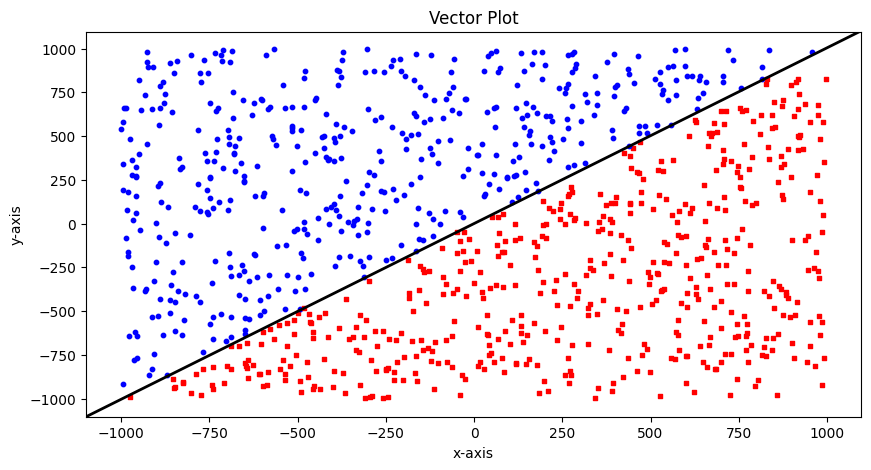

In [50]:
path = os.path.join("data", "dataAll.txt")
data = np.fromfile(path).reshape(1000, 3)
neuron = Perceptron(data, len(data))
neuron.teachPerceptron()